# Analyze Throw-ins!

In this notebook, we analyze everything about throw-ins including location, length, height, angle, and outcome. We create graphs that represent metrics such as success and failure rates of different throw-ins. 

In [14]:
# import libraries
from statsbombpy import sb
import json
import pandas as pd
import matplotlib.pyplot as plt
from mplsoccer.pitch import Pitch
import seaborn as sns
import numpy as np
from prettytable import PrettyTable

In [15]:
# obtain list of matches for specific competition and season 
df_matches = sb.matches(competition_id=55, season_id=43)
df_matches

,match_id,match_date,kick_off,competition,season,home_team,away_team,home_score,away_score,match_status,...,last_updated_360,match_week,competition_stage,stadium,referee,home_managers,away_managers,data_version,shot_fidelity_version,xy_fidelity_version
0,3788753,2021-06-16,15:00:00.000,Europe - UEFA Euro,2020,Finland,Russia,0,1,available,...,2021-09-22T16:39:05.697512,2,Group Stage,Saint-Petersburg Stadium,Danny Desmond Makkelie,Markku Kanerva,Stanislav Cherchesov,1.1.0,2,2
1,3788765,2021-06-20,18:00:00.000,Europe - UEFA Euro,2020,Switzerland,Turkey,3,1,available,...,2021-11-11T13:54:37.507376,3,Group Stage,Bakı Olimpiya Stadionu,Slavko Vinčić,Vladimir Petković,Şenol Güneş,1.1.0,2,2
2,3795107,2021-07-02,21:00:00.000,Europe - UEFA Euro,2020,Belgium,Italy,1,2,available,...,2021-09-23T00:02:51.495862,5,Quarter-finals,Allianz Arena,Slavko Vinčić,Roberto Martínez Montoliú,Roberto Mancini,1.1.0,2,2
3,3795221,2021-07-07,21:00:00.000,Europe - UEFA Euro,2020,England,Denmark,2,1,available,...,2021-09-22T22:33:37.494366,6,Semi-finals,Wembley Stadium,Danny Desmond Makkelie,Gareth Southgate,Kasper Hjulmand,1.1.0,2,2
4,3795506,2021-07-11,21:00:00.000,Europe - UEFA Euro,2020,Italy,England,1,1,available,...,2021-09-22T22:40:31.690550,7,Final,Wembley Stadium,Björn Kuipers,Roberto Mancini,Gareth Southgate,1.1.0,2,2
5,3794688,2021-06-29,18:00:00.000,Europe - UEFA Euro,2020,England,Germany,2,0,available,...,2021-09-22T23:46:25.457149,4,Round of 16,Wembley Stadium,Danny Desmond Makkelie,Gareth Southgate,Joachim Löw,1.1.0,2,2
6,3794692,2021-06-29,21:00:00.000,Europe - UEFA Euro,2020,Sweden,Ukraine,1,2,available,...,2021-09-22T23:38:19.483199,4,Round of 16,Hampden Park,Daniele Orsato,Jan Olof Andersson,Andrii Shevchenko,1.1.0,2,2
7,3794686,2021-06-28,18:00:00.000,Europe - UEFA Euro,2020,Croatia,Spain,3,5,available,...,2021-09-22T23:30:10.428563,4,Round of 16,Parken,Cüneyt Çakιr,Zlatko Dalić,Luis Enrique Martínez García,1.1.0,2,2
8,3794687,2021-06-27,21:00:00.000,Europe - UEFA Euro,2020,Belgium,Portugal,1,0,available,...,2021-09-22T16:40:48.020474,4,Round of 16,Estadio de La Cartuja,Felix Brych,Roberto Martínez Montoliú,Fernando Manuel Fernandes da Costa Santos,1.1.0,2,2
9,3794685,2021-06-26,21:00:00.000,Europe - UEFA Euro,2020,Italy,Austria,2,1,available,...,2021-09-22T16:40:41.310001,4,Round of 16,Wembley Stadium,Anthony Taylor,Roberto Mancini,Franco Foda,1.1.0,2,2


In [16]:
# obtain event info for specific match
df_events = sb.events(match_id = 3788741)
df_events

,ball_receipt_outcome,ball_recovery_offensive,ball_recovery_recovery_failure,block_deflection,carry_end_location,clearance_aerial_won,clearance_body_part,clearance_head,clearance_left_foot,clearance_right_foot,...,shot_statsbomb_xg,shot_technique,shot_type,substitution_outcome,substitution_replacement,tactics,team,timestamp,type,under_pressure
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,"{'formation': 4141, 'lineup': [{'player': {'id...",Turkey,00:00:00.000,Starting XI,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,"{'formation': 433, 'lineup': [{'player': {'id'...",Italy,00:00:00.000,Starting XI,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Italy,00:00:00.000,Half Start,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Turkey,00:00:00.000,Half Start,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Italy,00:00:00.000,Half Start,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3798,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Italy,00:04:29.312,Injury Stoppage,NaN
3799,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Turkey,00:04:31.909,Injury Stoppage,NaN
3800,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Italy,00:38:59.616,Injury Stoppage,NaN
3801,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Turkey,00:07:12.643,Own Goal Against,NaN


In [17]:
# obtain information about columns and value types for event data
df_events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3803 entries, 0 to 3802
Data columns (total 84 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   ball_receipt_outcome            137 non-null    object 
 1   ball_recovery_offensive         1 non-null      object 
 2   ball_recovery_recovery_failure  6 non-null      object 
 3   block_deflection                1 non-null      object 
 4   carry_end_location              862 non-null    object 
 5   clearance_aerial_won            14 non-null     object 
 6   clearance_body_part             39 non-null     object 
 7   clearance_head                  25 non-null     object 
 8   clearance_left_foot             8 non-null      object 
 9   clearance_right_foot            6 non-null      object 
 10  counterpress                    127 non-null    object 
 11  dribble_nutmeg                  1 non-null      object 
 12  dribble_outcome                 32

In [18]:
# obtaining the csv file with the event data from all matches
# creating a dataframe with this data
df_allData = pd.read_csv('full_data_sorted.csv')
df_allData

/var/folders/n4/wr2pjk454g5cxqdbd2qywndc0000gn/T/ipykernel_75573/555530438.py:3: DtypeWarning: Columns (2,4,12,26,35,43,49,69,85,86,87,88,89,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111) have mixed types. Specify dtype option on import or set low_memory=False.
  df_allData = pd.read_csv('full_data_sorted.csv')


,Unnamed: 0,ball_receipt_outcome,ball_recovery_offensive,ball_recovery_recovery_failure,block_deflection,carry_end_location,clearance_aerial_won,clearance_body_part,clearance_head,clearance_left_foot,...,shot_saved_to_post,shot_redirect,pass_straight,goalkeeper_shot_saved_off_target,shot_saved_off_target,shot_follows_dribble,dribble_no_touch,goalkeeper_penalty_saved_to_post,goalkeeper_success_in_play,player_off_permanent
0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192690,4814,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
192691,4715,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
192692,4815,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
192693,4983,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
# filtering only plays from throw ins
df_throwIn = df_allData.loc[df_allData['play_pattern'] == 'From Throw In']
df_throwIn

,Unnamed: 0,ball_receipt_outcome,ball_recovery_offensive,ball_recovery_recovery_failure,block_deflection,carry_end_location,clearance_aerial_won,clearance_body_part,clearance_head,clearance_left_foot,...,shot_saved_to_post,shot_redirect,pass_straight,goalkeeper_shot_saved_off_target,shot_saved_off_target,shot_follows_dribble,dribble_no_touch,goalkeeper_penalty_saved_to_post,goalkeeper_success_in_play,player_off_permanent
12,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13,1067,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14,2088,NaN,NaN,NaN,NaN,"[3.3, 12.7]",NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16,1068,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192565,2803,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
192566,4023,NaN,NaN,NaN,NaN,"[70.4, 28.6]",NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
192567,4633,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
192585,1419,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
# count number of throw-ins across all matches
throw_count = 0
for pass_type in df_throwIn["pass_type"]:
    current_matchID=df_throwIn
    if pass_type == "Throw-in":
        throw_count+=1
print(throw_count)

1948


There are 1948 throw-ins across all matches. Now, we want to find out how many throw-ins there are per match.

In [40]:
# count number of throw-ins per match

# match id and number of throw ins in the match
match_throw_count = {}

for row in df_throwIn.index:
    if df_throwIn["pass_type"][row]=="Throw-in":
        if df_throwIn["match_id"][row] in match_throw_count:
            match_throw_count[df_throwIn["match_id"][row]]+=1
        else:
            match_throw_count[df_throwIn["match_id"][row]]=1
print(match_throw_count)
throw_sum = 0
for count in match_throw_count.values():
    throw_sum += count
throw_avg = (throw_sum)/len(match_throw_count)
print(throw_avg)

{3788741: 45, 3788742: 37, 3788754: 26, 3794690: 42, 3794686: 39, 3788758: 44, 3788774: 48, 3788762: 42, 3795107: 33, 3788763: 35, 3788775: 39, 3788759: 22, 3794687: 26, 3794691: 45, 3788755: 33, 3788743: 48, 3788748: 56, 3788772: 39, 3788764: 27, 3795506: 64, 3788744: 28, 3788752: 35, 3788768: 28, 3788769: 41, 3788753: 37, 3788745: 35, 3788765: 26, 3788773: 25, 3788749: 39, 3788766: 33, 3788770: 29, 3788750: 33, 3788746: 31, 3788747: 57, 3788751: 31, 3788771: 35, 3788767: 49, 3795109: 32, 3795220: 49, 3788756: 34, 3794688: 31, 3788760: 42, 3788776: 48, 3795187: 31, 3794692: 46, 3794685: 61, 3788761: 30, 3794689: 40, 3788757: 34, 3795221: 46, 3795108: 42}
38.19607843137255


Here, we can see how many throw-ins there are per match. The average amount of throw-ins per match is 38 throw ins! 

In [22]:
# obtaining number of throw ins, pass location, pass length, pass height, pass angle, outcome

# throw-in number and its corresponding location, length, height, angle, and outcome
pass_info = {}
throw_count=0
for row in df_throwIn.index:
    if df_throwIn["pass_type"][row] == "Throw-in":
        throw_count +=1
        temp_list = [json.loads(df_throwIn["location"][row]), df_throwIn["pass_length"][row], df_throwIn["pass_height"][row], df_throwIn["pass_angle"][row]]
        if df_throwIn["pass_outcome"][row] == "Incomplete":
            temp_list.append("Incomplete")
        else:
            temp_list.append("Complete")
        pass_info[throw_count] = temp_list
print(pass_info)

{1: [[43.1, 0.1], 28.285154, 'Low Pass', 2.876891, 'Complete'], 2: [[91.1, 0.1], 8.823832, 'Low Pass', 0.8978253, 'Complete'], 3: [[83.0, 0.1], 12.841339, 'Low Pass', 1.2293439, 'Complete'], 4: [[64.3, 80.0], 25.89614, 'Low Pass', -2.664129, 'Complete'], 5: [[30.0, 0.1], 27.627884, 'Low Pass', 2.2381885, 'Complete'], 6: [[22.8, 0.1], 20.61286, 'High Pass', 0.37239844, 'Incomplete'], 7: [[76.0, 0.1], 8.700575, 'Low Pass', 0.91580147, 'Complete'], 8: [[67.9, 0.1], 19.61734, 'Low Pass', 2.7326849, 'Complete'], 9: [[57.0, 80.0], 8.021222, 'Low Pass', -0.62604654, 'Complete'], 10: [[26.2, 80.0], 18.816216, 'Low Pass', -1.8841437, 'Complete'], 11: [[33.3, 80.0], 10.962208, 'Low Pass', -0.6234308, 'Complete'], 12: [[47.4, 80.0], 11.321661, 'Low Pass', -0.8228806, 'Complete'], 13: [[72.4, 80.0], 17.325415, 'Low Pass', -2.7632298, 'Complete'], 14: [[99.8, 0.1], 16.686821, 'High Pass', 1.0293491, 'Complete'], 15: [[91.9, 0.1], 15.052574, 'Low Pass', 1.2532474, 'Complete'], 16: [[55.4, 0.1], 9.52

This dicationary shows us detailed information of each throw-in including the location, length, height, angle, and outcome. 

In [23]:
# location of all the incomplete first contact throw ins
no_firstContact = []
for row in df_throwIn.index:
    if (df_throwIn["pass_type"][row]=="Throw-in"):
        if (df_throwIn["pass_outcome"][row]=="Incomplete"):
            no_firstContact.append([json.loads(df_throwIn["location"][row]), json.loads(df_throwIn["pass_end_location"][row])])
print(no_firstContact)

[[[22.8, 0.1], [42.0, 7.6]], [[115.6, 0.1], [110.1, 17.0]], [[11.2, 0.1], [31.8, 4.8]], [[22.2, 0.1], [37.4, 2.8]], [[20.8, 0.1], [44.8, 6.1]], [[59.2, 0.1], [73.3, 15.9]], [[112.2, 0.1], [110.1, 35.3]], [[92.9, 80.0], [103.6, 76.8]], [[99.9, 80.0], [99.2, 70.6]], [[40.4, 0.1], [81.8, 12.2]], [[45.4, 0.1], [79.4, 15.2]], [[38.6, 80.0], [101.3, 66.1]], [[55.4, 80.0], [71.8, 65.5]], [[25.7, 80.0], [42.7, 70.5]], [[21.1, 80.0], [67.5, 62.1]], [[8.5, 0.1], [27.2, 4.4]], [[58.4, 0.1], [75.5, 9.1]], [[81.8, 0.1], [89.5, 15.6]], [[31.8, 80.0], [57.8, 72.9]], [[54.5, 0.1], [72.2, 17.1]], [[22.1, 80.0], [49.1, 71.5]], [[43.3, 80.0], [70.9, 73.7]], [[20.6, 0.1], [50.1, 4.2]], [[26.6, 0.1], [49.7, 4.7]], [[33.4, 80.0], [73.2, 75.2]], [[34.1, 80.0], [59.4, 71.7]], [[53.0, 80.0], [73.7, 72.4]], [[11.9, 0.1], [29.4, 3.1]], [[57.1, 80.0], [89.6, 77.9]], [[88.7, 80.0], [106.0, 66.8]], [[9.3, 0.1], [30.2, 7.0]], [[84.1, 0.1], [107.0, 4.4]], [[111.7, 80.0], [115.1, 45.9]], [[95.8, 80.0], [102.0, 74.1]],

The list above displays the start and finish locations of throw-ins that were unsucessful (incomplete). 

In [24]:
# inputting pass information into a dataframe
df_passInfo = pd.DataFrame.from_dict(pass_info,orient='index')
df_passInfo.columns=['location','length','height','angle', 'outcome']
df_passInfo

,location,length,height,angle,outcome
1,"[43.1, 0.1]",28.285154,Low Pass,2.876891,Complete
2,"[91.1, 0.1]",8.823832,Low Pass,0.897825,Complete
3,"[83.0, 0.1]",12.841339,Low Pass,1.229344,Complete
4,"[64.3, 80.0]",25.896140,Low Pass,-2.664129,Complete
5,"[30.0, 0.1]",27.627884,Low Pass,2.238189,Complete
...,...,...,...,...,...
1944,"[106.8, 80.0]",12.317873,High Pass,-1.432344,Complete
1945,"[106.4, 80.0]",32.728733,High Pass,-1.482073,Incomplete
1946,"[36.2, 0.1]",14.926487,Low Pass,2.527574,Complete
1947,"[54.8, 0.1]",31.710093,High Pass,1.030918,Complete


In [25]:
print(df_passInfo["length"].describe(include='all'))

count    1948.000000
mean       18.856812
std         9.212686
min         3.417602
25%        11.530720
50%        17.263545
75%        24.450562
max        64.222270
Name: length, dtype: float64


In [26]:
print(df_passInfo["angle"].describe(include='all'))

count    1948.000000
mean       -0.038195
std         1.774420
min        -3.074791
25%        -1.526906
50%        -0.107652
75%         1.390220
max         3.113563
Name: angle, dtype: float64


In [41]:
# percent of unsucessful throw ins
print(throw_count, len(no_firstContact))
no_contact = (len(no_firstContact)/throw_count)*100
print(no_contact)

1948 256
13.141683778234087


There were 1948 throw-ins. 256 of these had unsucessful (incomplete) first contacts. This leads to 13.14% of unsucessful throw-ins. 

In [28]:
# create table of the data 
myTable = PrettyTable(["Total Throw-ins", "Sucessful First Contact", "Unsucessful First Contact"])
myTable.add_row([throw_count, (throw_count - len(no_firstContact)),len(no_firstContact)])
print(myTable)

+-----------------+-------------------------+---------------------------+
| Total Throw-ins | Sucessful First Contact | Unsucessful First Contact |
+-----------------+-------------------------+---------------------------+
|       1948      |           1692          |            256            |
+-----------------+-------------------------+---------------------------+


### Throw-in Length

In [29]:
# count out of how many unsuccessful throw ins how many are high , how many are far, etc. 

# length of throw ins 

# finding max length of a throw in
max_length = df_passInfo["length"].max()
print("The maximum length of a throw in was: " + str(max_length))

# finding min length of a throw in 
min_length = df_passInfo["length"].min()
print("The minimum length of a throw in was: " + str(min_length))

# finding the average length of a throw in
avg_length = df_passInfo["length"].mean()
print("The average lengthof a throw in was: " + str(avg_length))

median_length = df_passInfo["length"].median()
print("The median length of a throw in was: " + str(median_length))

# define long and short pass : long pass > avg_length , short pass < avg_length
long_throw = 0
short_throw = 0
for length in df_passInfo["length"]:
    if length >= avg_length:
        long_throw += 1
    else:
        short_throw += 1
print(long_throw, short_throw)

# percent of long passes and short passes that were incomplete
incomplete_long = 0 
incomplete_short = 0
for row in df_passInfo.index:
    if (df_passInfo["length"][row] >= avg_length) and (df_passInfo["outcome"][row] == "Incomplete"):
        incomplete_long += 1
    if (df_passInfo["length"][row] < avg_length) and (df_passInfo["outcome"][row] == "Incomplete"):
        incomplete_short+=1
print(incomplete_long, incomplete_short)
incomplete_long_percent = round((incomplete_long/long_throw)*100,2)
incomplete_short_percent = round((incomplete_short/short_throw)*100,2)
print(incomplete_long_percent, incomplete_short_percent)

The maximum length of a throw in was: 64.22227
The minimum length of a throw in was: 3.4176016
The average lengthof a throw in was: 18.85681183352156
The median length of a throw in was: 17.263545
855 1093
186 70
21.75 6.4


The maximum length of a throw in was: 64.2. The minimum length of a throw in was: 3.4. The average lengthof a throw in was: 18.9. The median length of a throw in was: 17.2.

In [30]:
# test run of a table
myTable1 = PrettyTable(["Total Throw-ins", "Total Long Throw-ins", "Total Short Throw-ins", "Incomplete Long Throw-ins", "Incomplete Short Throw-ins"])
myTable1.add_row([throw_count, long_throw, short_throw, f"{incomplete_long_percent}%", f"{incomplete_short_percent}%"])
print(myTable1)

+-----------------+----------------------+-----------------------+---------------------------+----------------------------+
| Total Throw-ins | Total Long Throw-ins | Total Short Throw-ins | Incomplete Long Throw-ins | Incomplete Short Throw-ins |
+-----------------+----------------------+-----------------------+---------------------------+----------------------------+
|       1948      |         855          |          1093         |           21.75%          |            6.4%            |
+-----------------+----------------------+-----------------------+---------------------------+----------------------------+


In [31]:
# final table
myTable1 = PrettyTable(["Throw-in Length", "Total", "Failure Rate"])
myTable1.add_row(["Long Throw-ins", long_throw, f"{incomplete_long_percent}%"])
myTable1.add_row(["Short Throw-ins", short_throw, f"{incomplete_short_percent}%"])
print(myTable1)

+-----------------+-------+--------------+
| Throw-in Length | Total | Failure Rate |
+-----------------+-------+--------------+
|  Long Throw-ins |  855  |    21.75%    |
| Short Throw-ins |  1093 |     6.4%     |
+-----------------+-------+--------------+


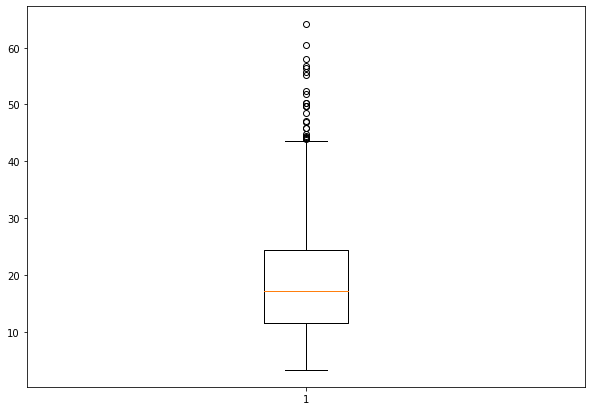

In [32]:
# graphing our data into a boxplot to see the outliers
data = df_passInfo["length"]
 
fig = plt.figure(figsize =(10, 7))
 
# Creating plot
plt.boxplot(data)
 
# show plot
plt.show()

We note here that our data is skewed due to the excess amount of outliers. In the future, we would like to update our definition of long and short throw-ins by adding in a new category: medium length throw-ins. This way, the outliers will have less of an impact on our data. 

There are 855 long throw-ins and 1093 short throw-ins. 21.75% of long throw-ins are unsucessful and only 6.4% of short throw-ins are unsucessful. 

### Throw-in Height

In [33]:
# heigth of throw ins 

# number of high and low passes
high_pass = 0
low_pass = 0
for height in df_passInfo["height"]:
    if height == "High Pass":
        high_pass +=1
    else:
        low_pass +=1
print(high_pass, low_pass)

# number of high and low passes that were incomplete
incomplete_high = 0
incomplete_low = 0
for row in df_passInfo.index:
    if (df_passInfo["height"][row] == "High Pass") and (df_passInfo["outcome"][row] == "Incomplete"):
        incomplete_high += 1
    if (df_passInfo["height"][row] == "Low Pass") and (df_passInfo["outcome"][row] == "Incomplete"):
        incomplete_low+=1
print(incomplete_high, incomplete_low)
incomplete_high_percent = round((incomplete_high/high_pass)*100,2)
incomplete_low_percent = round((incomplete_low/low_pass)*100,2)
print(incomplete_high_percent, incomplete_low_percent)


513 1435
194 62
37.82 4.32


In [34]:
myTable1 = PrettyTable(["Throw-in Height", "Total", "Failure Rate"])
myTable1.add_row(["High Throw-ins", high_pass, f"{incomplete_high_percent}%"])
myTable1.add_row(["Low Throw-ins", low_pass, f"{incomplete_low_percent}%"])
print(myTable1)

+-----------------+-------+--------------+
| Throw-in Height | Total | Failure Rate |
+-----------------+-------+--------------+
|  High Throw-ins |  513  |    37.82%    |
|  Low Throw-ins  |  1435 |    4.32%     |
+-----------------+-------+--------------+


There are 513 high throw-ins and 1435 low throw-ins. However, 37.82% of high throw-ins are unsuccessful compared to only 4.32% of low throw-ins! 

### Throw-in Angle

The angle of the throw-in pass is in radians with 0 pointing towards the teams goal, positive values indicating clockwise angles, and negative values indicating counterclockwise angles. 

In [35]:
# angle of throw ins
# the angle of the pass is in radians with 0 pointing towards the teams attacking goal, 
# positive values indicate clockwise angle, negative values indicate counterclockwise angle

# lateral : -1<angle<1, backwards < -1, forwards, > 1
lateral_throw = 0
back_throw = 0
forward_throw = 0
for angle in df_passInfo["angle"]:
    if angle < -1:
        back_throw +=1
    elif angle>1:
        forward_throw +=1
    else:
        lateral_throw +=1
print(lateral_throw, back_throw, forward_throw)

# number of lateral, back, and forward throws that were incomplete
incomplete_lateral = 0
incomplete_back = 0
incomplete_forward = 0
for row in df_passInfo.index:
    if (df_passInfo["angle"][row] < -1) and (df_passInfo["outcome"][row] == "Incomplete"):
        incomplete_back += 1
    elif (df_passInfo["angle"][row] > 1 ) and (df_passInfo["outcome"][row] == "Incomplete"):
        incomplete_forward+=1
    elif (df_passInfo["angle"][row] < 1 and df_passInfo["angle"][row] > -1) and (df_passInfo["outcome"][row] == "Incomplete"):
        incomplete_lateral+=1
print(incomplete_lateral, incomplete_back, incomplete_forward)
incomplete_lateral_percent = round((incomplete_lateral/lateral_throw)*100,2)
incomplete_back_percent = round((incomplete_back/back_throw)*100,2)
incomplete_forward_percent = round((incomplete_forward/forward_throw)*100,2)
print(incomplete_lateral_percent, incomplete_back_percent, incomplete_forward_percent)

729 630 589
192 36 28
26.34 5.71 4.75


In [36]:
myTable1 = PrettyTable(["Throw-in Angle", "Total", "Failure Rate"])
myTable1.add_row(["Lateral Throw-ins", lateral_throw, f"{incomplete_lateral_percent}%"])
myTable1.add_row(["Backward Throw-ins", back_throw, f"{incomplete_back_percent}%"])
myTable1.add_row(["Forward Throw-ins", forward_throw, f"{incomplete_forward_percent}%"])
print(myTable1)

+--------------------+-------+--------------+
|   Throw-in Angle   | Total | Failure Rate |
+--------------------+-------+--------------+
| Lateral Throw-ins  |  729  |    26.34%    |
| Backward Throw-ins |  630  |    5.71%     |
| Forward Throw-ins  |  589  |    4.75%     |
+--------------------+-------+--------------+


There are 729 lateral throw-ins, 630 backward throw-ins, and 589 forward throw-ins. 26.34% of lateral throw-ins are incomplete in contrast to 5.71% of unsucessful backward throw-ins and 4.75% of unsucessful forward throw-ins. 

### Throw-in Location

For location, we split our soccer field into two main areas: penalty and attacking. The penatly area is the first 18 yards and the last 18 yards. The attacking area is everything in between. 

In [37]:
# location of throw ins

# split location into 2: penalty area (18 yards) on both sides and down the middle 
# area 1 (0-18 and 102-120): penalty area, area2 (18-102) attacking area

area1_throw = 0
area2_throw = 0
for loc in df_passInfo["location"]:
    if loc[0] > 18 and loc[0] < 102:
        area2_throw +=1
    else:
        area1_throw +=1
print(area1_throw, area2_throw)

# number incomplete throw ins per area
incomplete_area1 =0
incomplete_area2 = 0
for row in df_passInfo.index:
    if (df_passInfo["location"][row][0] > 18 and df_passInfo["location"][row][0] < 102) and (df_passInfo["outcome"][row] == "Incomplete"):
        incomplete_area2 += 1
    elif (df_passInfo["outcome"][row] == "Incomplete"):
        incomplete_area1+=1
print(incomplete_area1, incomplete_area2)
incomplete_area1_percent = round((incomplete_area1/area1_throw)*100,2)
incomplete_area2_percent = round((incomplete_area2/area2_throw)*100,2)
print(incomplete_area1_percent, incomplete_area2_percent)

359 1589
63 193
17.55 12.15


In [38]:
myTable1 = PrettyTable(["Throw-in Location", "Total", "Failure Rate"])
myTable1.add_row(["Penalty", area1_throw, f"{incomplete_area1_percent}%"])
myTable1.add_row(["Attacking", area2_throw, f"{incomplete_area2_percent}%"])
print(myTable1)

+-------------------+-------+--------------+
| Throw-in Location | Total | Failure Rate |
+-------------------+-------+--------------+
|      Penalty      |  359  |    17.55%    |
|     Attacking     |  1589 |    12.15%    |
+-------------------+-------+--------------+


A total of 359 throw-ins occured in the penalty area and 1589 throw-ins occured in the attacking area. However, 17.55% of penatly area throw-ins were unsuccessful. 

In [39]:
myTable1 = PrettyTable(["Throw-in Feature", "Total", "Complete" , "Incomplete", "Sucess Rate"])
myTable1.add_row(["Long Throw-ins", long_throw, (long_throw-incomplete_long), incomplete_long, f"{100-(incomplete_long_percent)}%"])
myTable1.add_row(["Short Throw-ins", short_throw, (short_throw-incomplete_short), incomplete_short, f"{100-(incomplete_short_percent)}%"])
myTable1.add_row(["High Throw-ins", high_pass, (high_pass-incomplete_high), incomplete_high, f"{100-(incomplete_high_percent)}%"])
myTable1.add_row(["Low Throw-ins", low_pass, (low_pass-incomplete_low), incomplete_low, f"{100-(incomplete_low_percent)}%"])
myTable1.add_row(["Lateral Throw-ins", lateral_throw, (lateral_throw-incomplete_lateral), incomplete_lateral, f"{100-(incomplete_lateral_percent)}%"])
myTable1.add_row(["Backward Throw-ins", back_throw, (back_throw-incomplete_back), incomplete_back, f"{100-(incomplete_back_percent)}%"])
myTable1.add_row(["Forward Throw-ins", forward_throw, (forward_throw-incomplete_forward), incomplete_forward, f"{100-(incomplete_forward_percent)}%"])
myTable1.add_row(["Penalty (Location) Throw-ins", area1_throw, (area1_throw-incomplete_area1), incomplete_area1, f"{100-(incomplete_area1_percent)}%"])
myTable1.add_row(["Attacking (Location) Throw-ins", area2_throw, (area2_throw-incomplete_area2), incomplete_area2, f"{100-(incomplete_area2_percent)}%"])
print(myTable1)

+--------------------------------+-------+----------+------------+-------------+
|        Throw-in Feature        | Total | Complete | Incomplete | Sucess Rate |
+--------------------------------+-------+----------+------------+-------------+
|         Long Throw-ins         |  855  |   669    |    186     |    78.25%   |
|        Short Throw-ins         |  1093 |   1023   |     70     |    93.6%    |
|         High Throw-ins         |  513  |   319    |    194     |    62.18%   |
|         Low Throw-ins          |  1435 |   1373   |     62     |    95.68%   |
|       Lateral Throw-ins        |  729  |   537    |    192     |    73.66%   |
|       Backward Throw-ins       |  630  |   594    |     36     |    94.29%   |
|       Forward Throw-ins        |  589  |   561    |     28     |    95.25%   |
|  Penalty (Location) Throw-ins  |  359  |   296    |     63     |    82.45%   |
| Attacking (Location) Throw-ins |  1589 |   1396   |    193     |    87.85%   |
+---------------------------

We are now able to see that short, low throw-ins are more successful than long, high throw-ins. Additionally, backward and forward throw-ins are more sucessful compared to lateral throw-ins. Lastly, throwing in the ball in the attacking area leads to a higher chance of a successful throw-in. 